In [ ]:
'''
Junction is a small town with two suburbs. The data file “Major Project – Data Set” contains data on 555 houses
sold in Junction between 2016 and 2021. This data includes the price at which the house was sold, which of two
agents sold the house (all houses are sold through an agent by law), the year in which the house was sold as well
as data on various characteristics of each house sold (age, size, number of stories etc.). These characteristics serve
as possible explanatory variables of sale price.
Data definitions follow:
OBS = observation
AGE = age of house in years
SHOPS = 1 if house is close to a shopping precinct, 0 otherwise
CRIME = crime rate of the suburb within which the house is located
TOWN = distance in kilometres to the town centre
STORIES = number of dwelling stories
OCEAN = 1 if house has an ocean view, 0 otherwise
POOL = 1 if house has a pool, 0 otherwise
PRICE = price at which the house was sold (in dollars)
AGENT = selling agent – “W&M” (0) or “A&B” (1)
SIZE = size of the house in square metres
SUBURB = Mayfair (0) or Claygate (1)
TENNIS = 1 if house has a tennis court, 0 otherwise
SOLD = year of last sale (2016 to 2021)

'''

In [5]:
'''
Task 1 – 15% of project grade (recommended length: 1.5 pages)
You are required to provide a comprehensive summary of the data set contained in the “Major Project – Data Set”
file. How you choose to do this is entirely at your discretion. However, it is recommended that you consider using
both summary statistics and graphical methods while also noting any peculiarities within the data set.
'''
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing data
df = pd.read_excel('Major Project - Data Set 260922(2).xlsx',)
df.head()

,OBS,AGE,SHOPS,CRIME,TOWN,STORIES,OCEAN,POOL,PRICE,AGENT,SIZE,SUBURB,TENNIS,SOLD
0,1,5,0,3,60,1,0,0,378558,1,154,0,0,2018
1,2,14,1,3,60,1,0,0,324352,0,131,0,0,2019
2,3,17,3,3,60,1,0,0,355641,0,144,0,0,2016
3,4,16,1,3,60,1,1,0,410755,1,157,0,0,2019
4,5,14,1,3,60,1,0,0,477251,0,202,0,0,2017


In [7]:
# First we shall start with the summary statistics
# we will use the describe function to get the summary statistics
df.describe().T # we transpose the data so that it is easier to read

,count,mean,std,min,25%,50%,75%,max
OBS,555.0,278.000000,160.358972,1.0,139.5,278.0,416.5,555.0
AGE,555.0,14.300901,3.629191,2.0,13.0,15.0,16.0,29.0
SHOPS,555.0,1.059459,0.837994,0.0,0.0,1.0,2.0,3.0
CRIME,555.0,2.495495,0.869394,1.0,1.0,3.0,3.0,3.0
TOWN,555.0,52.432432,13.040911,30.0,30.0,60.0,60.0,60.0
STORIES,555.0,1.160360,0.426403,1.0,1.0,1.0,1.0,4.0
OCEAN,555.0,0.153153,0.360460,0.0,0.0,0.0,0.0,1.0
POOL,555.0,0.140541,0.347861,0.0,0.0,0.0,0.0,1.0
PRICE,555.0,418187.553153,141715.332629,20000.0,375374.0,407500.0,448012.5,3400000.0
AGENT,555.0,0.236036,0.425028,0.0,0.0,0.0,0.0,1.0


In [8]:
# The first thing here to note is the difference in units, this shows us we will need to scale the data later on

# lets look at the data types
df.dtypes

OBS        int64
AGE        int64
SHOPS      int64
CRIME      int64
TOWN       int64
STORIES    int64
OCEAN      int64
POOL       int64
PRICE      int64
AGENT      int64
SIZE       int64
SUBURB     int64
TENNIS     int64
SOLD       int64
dtype: object

In [9]:
# we can see that all the data is numerical, this is good as we will not need to do any encoding

# lets look at the number of missing values
df.isnull().sum()

OBS        0
AGE        0
SHOPS      0
CRIME      0
TOWN       0
STORIES    0
OCEAN      0
POOL       0
PRICE      0
AGENT      0
SIZE       0
SUBURB     0
TENNIS     0
SOLD       0
dtype: int64

In [10]:
# we can see that there are no missing values, this is good as we will not need to do any imputation

# lets look at the number of unique values
df.nunique()

OBS        555
AGE         26
SHOPS        4
CRIME        2
TOWN         2
STORIES      4
OCEAN        2
POOL         2
PRICE      555
AGENT        2
SIZE       114
SUBURB       2
TENNIS       2
SOLD         6
dtype: int64

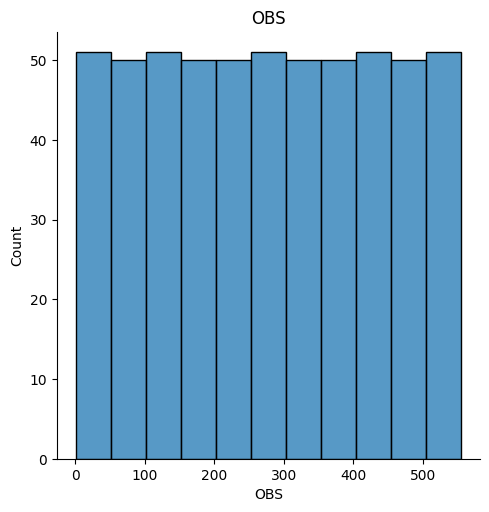

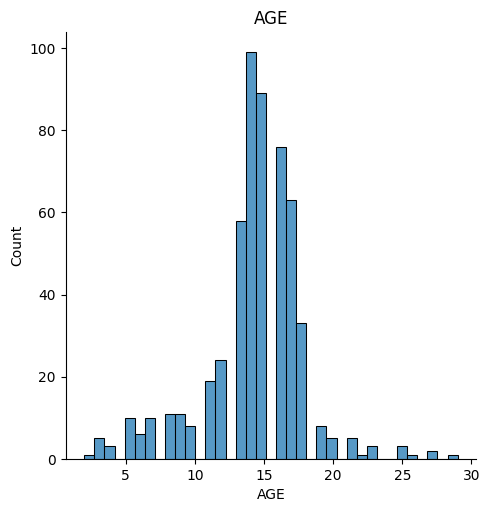

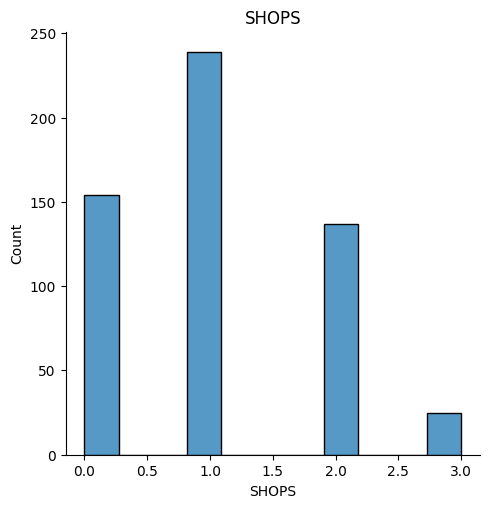

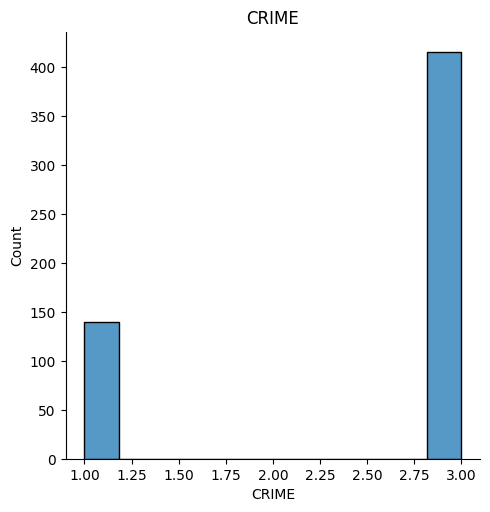

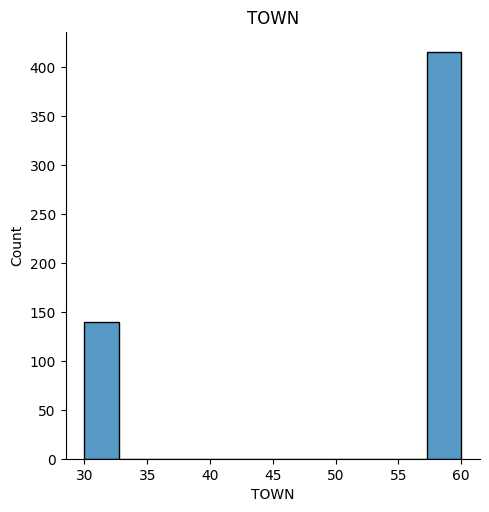

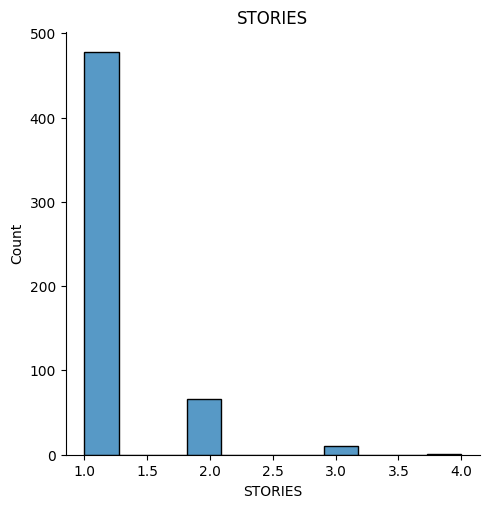

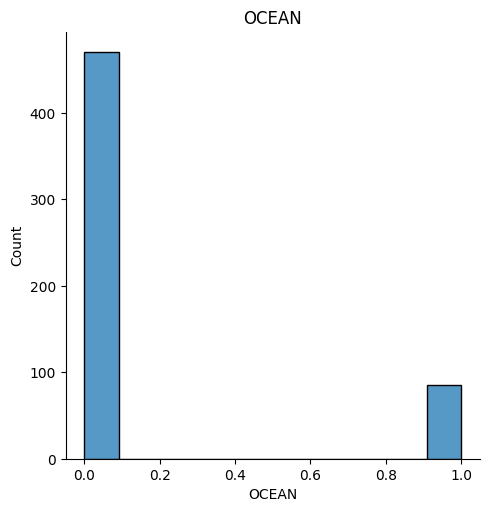

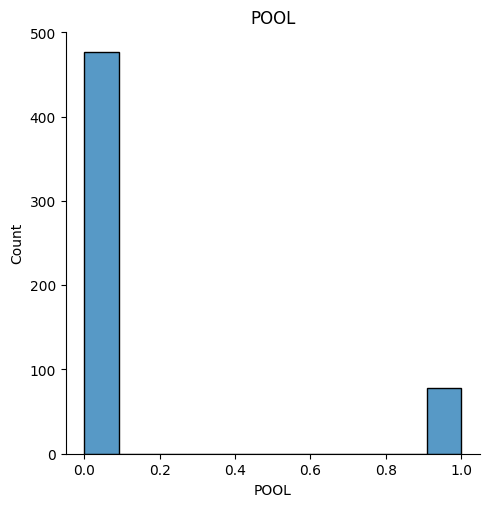

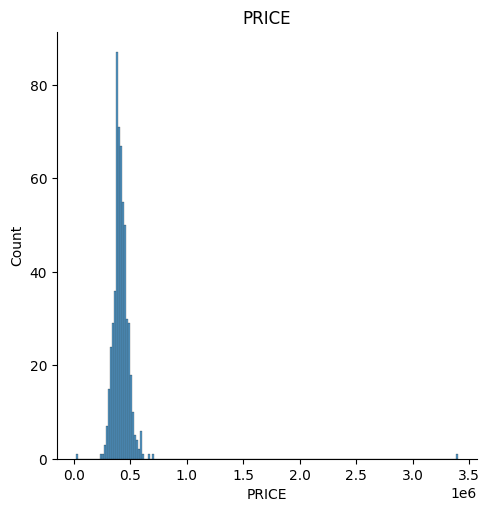

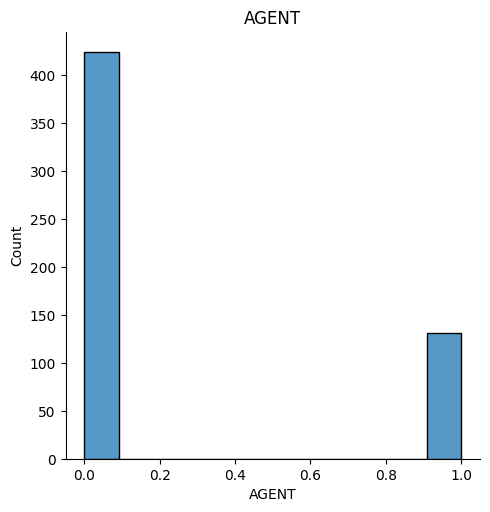

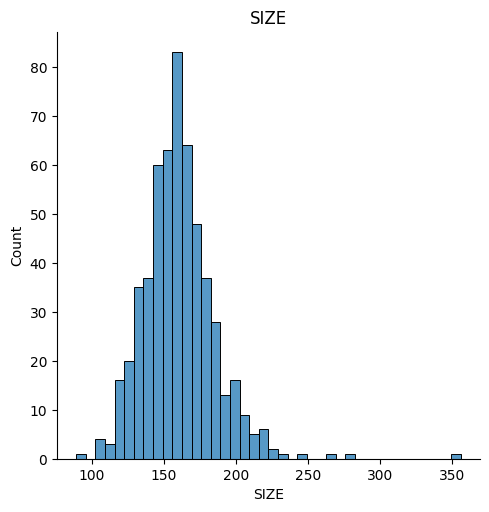

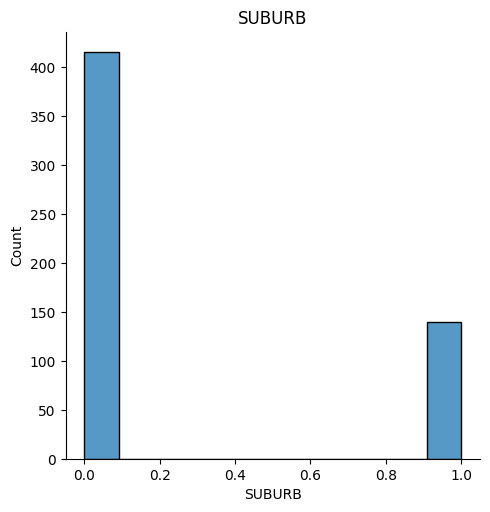

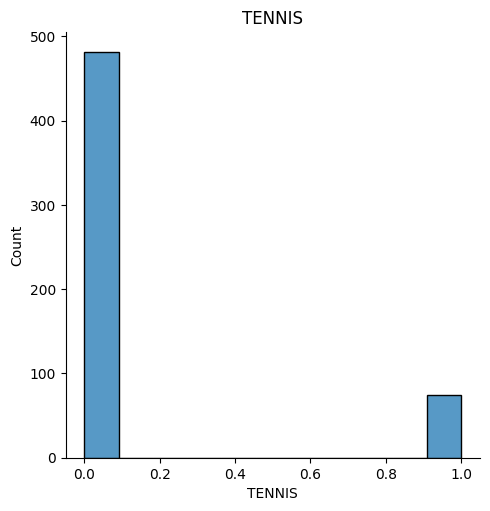

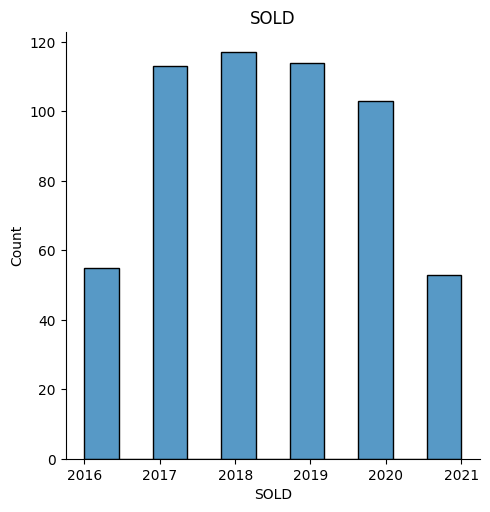

In [11]:
# we can see that there are 555 unique observations, this is good as we will not need to do any sampling

# We can now move onto the graphical methods
# we will start by looking at the distribution of the data
# we will use the distplot function from seaborn
# we will use a for loop to plot all the data
for i in df.columns:
    sns.displot(df[i])
    plt.title(i)
    plt.show()

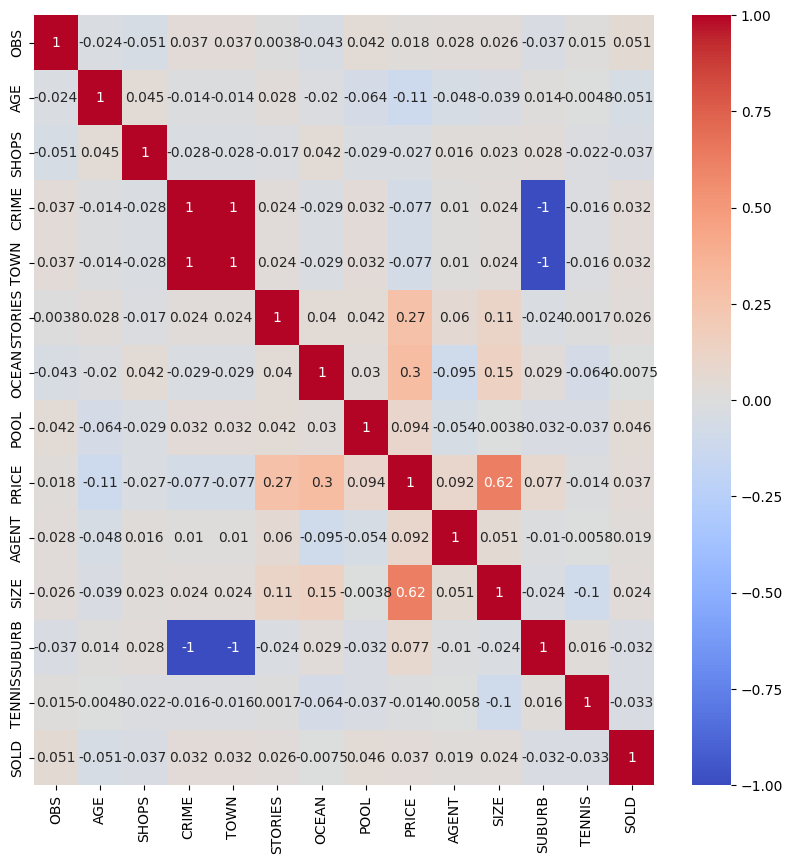

In [12]:
# Looking at the distributions this wont probably tell us much as the data is all numerical

# we will now look at the correlation between the data
# we will use the heatmap function from seaborn
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot: xlabel='SIZE', ylabel='PRICE'>

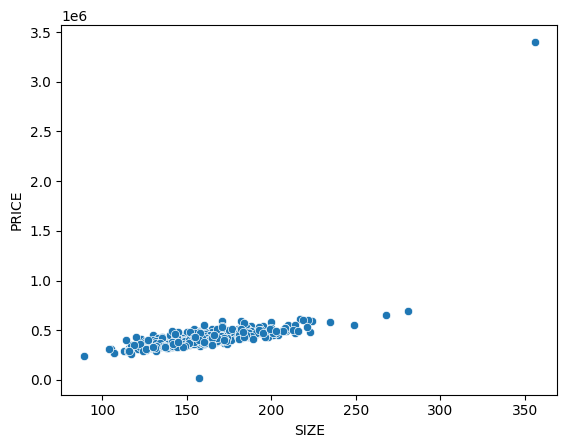

In [14]:
# we can see that there is a strong correlation between the price and the size of the house
# we can also see that there is a strong correlation between the price and the ocean view
# the negative correlation between the price and the crime rate is interesting same with the negative correlation 
# between the price and town


# first lets look at the relationship between the price and the size of the house
sns.scatterplot(x='SIZE', y='PRICE', data=df)

<AxesSubplot: xlabel='SIZE', ylabel='PRICE'>

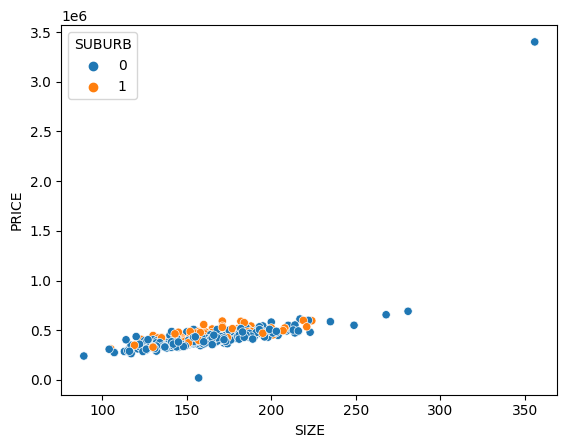

In [15]:
# We notice an outlier here, whether we choose to remove it or not is up to us as it is only one data point
# we can try to color it by the suburb to see if there is a difference
sns.scatterplot(x='SIZE', y='PRICE', hue='SUBURB', data=df)

<AxesSubplot: xlabel='SIZE', ylabel='PRICE'>

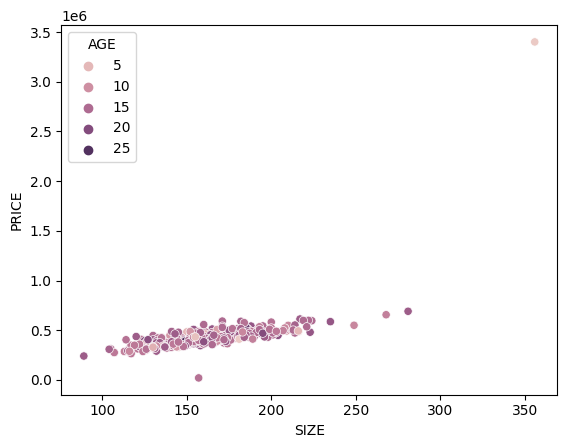

In [16]:
# we can see that there is no difference between the suburbs
# how about by age to see if there is a difference
sns.scatterplot(x='SIZE', y='PRICE', hue='AGE', data=df)

<AxesSubplot: xlabel='SUBURB', ylabel='count'>

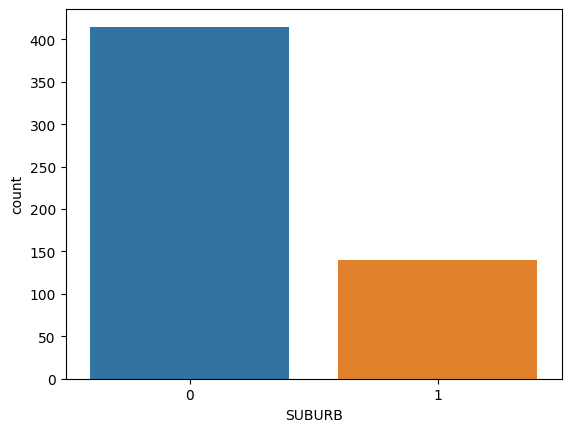

In [17]:
# remember age tells us how old the house is, so we can see that the older the house the cheaper it is

# lets count the number of houses by suburb
sns.countplot(x='SUBURB', data=df)

<AxesSubplot: xlabel='AGENT', ylabel='count'>

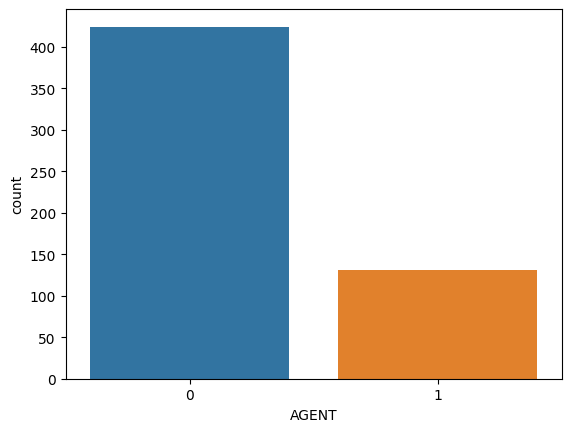

In [18]:
# we can see that there are more houses in Mayfair than Claygate

# how about by agent
sns.countplot(x='AGENT', data=df)

<AxesSubplot: xlabel='SUBURB', ylabel='PRICE'>

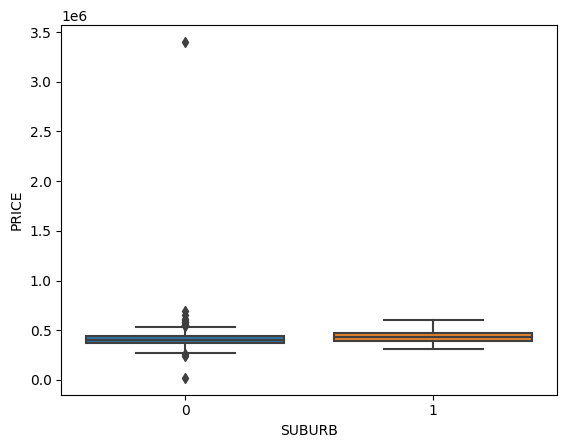

In [19]:
# we can see that there are more houses sold by W&M than A&B

# We can try to use a boxplot to see if there is a difference between the suburbs
sns.boxplot(x='SUBURB', y='PRICE', data=df)

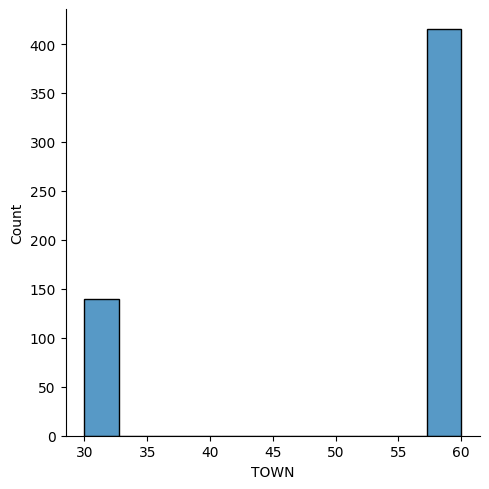

In [20]:
# we can see that there is a difference between the suburbs. The median price of houses in Mayfair is higher than
# the median price of houses in Claygate. this is interesting as we would expect the opposite because Mayfair is
# closer to the town centre

# how do we know its close the town centre? lets look at the distribution of the town variable
sns.displot(df['TOWN'])

In [22]:
# we can see that the town variable is skewed to the right, this means that the majority of the houses are close to
# the town centre


In [23]:
'''
Task 2 (including Headline Regression Model) – 50% of project grade (recommended length: 3 pages)
You have been hired by Joy, the wealthy owner of a house on Elm Street in Junction (not included in the data set)
to predict the price at which her house will sell. Her house has two stories, is in Claygate, is 178 square metres
large, is not near a shopping precinct and is 10 km from the town centre. She estimates that the house is about 10
years old and in a low crime area according to her experiences. Joy inherited the house from her uncle and is
therefore unsure when it was last sold. Some other features of the property can be seen below:
2
You are expected to build a regression model of house prices. In doing so, make sure that you use an appropriate
number of predictors to develop your estimates. Once you have constructed an appropriate model, use it to obtain
and provide for Joy’s house:
1. A point prediction of the sales price which it can be expected to fetch
2. A 95% interval prediction for this sale price
3. An estimate of the marginal effect of house size on this sale price
4. Financial advice on whether Joy should use “W&M” or “A&B” to sell her house. “W&M” charges a
commission of 2.5% whereas “A&B” charges a commission of 3.5% of the final sale price.
Joy, who claims to have some knowledge of regression analysis, has stressed that she thinks you should use a
regression model with an R2
of at least 88%.
Note: Task 1 directed you to take note of any peculiarities in the data set. There are other additional errors in the
data set that you may not have picked up on in Task 1. These will only become clear to you once you start working
on Task 2. Several problems can result if you fail to handle these issues correctly, so be mindful to address them,
both in your regression application as well as your final report. If resolving any of the errors in the dataset requires
you to make assumptions, make sure to clearly state your reasoning and approach in your report.
'''

# First lets check the most expensive house in the data set, and the cheapest
print(f'The most expensive house is {df["PRICE"].max()}')
print(f'The cheapest house is {df["PRICE"].min()}')

The most expensive house is 3400000
The cheapest house is 20000


In [24]:
df.shape

(555, 14)

In [25]:
# we can see that the most expensive house is 3400000 and the cheapest house is 20000
# i think we should first remove the outliers because they will skew the data

# we will use the zscore function to remove the outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
df = df[(z < 3).all(axis=1)] # we are saying that if the zscore is greater than 3 then we will remove it
# a zscore of 3 is the threshold for an outlier, which means that if the zscore is greater than 3 then it is an outlier
df.shape


(532, 14)

In [42]:
# from 555 to 532, we have removed 23 outliers
# we can now move onto the regression model

# First we will split the data into the independent and dependent variables
# the OBS is a unique identifier so we will remove it
X = df.drop(['OBS', 'PRICE'], axis=1)
y = df['PRICE']

# we will now split the data into the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X.head()

,AGE,SHOPS,CRIME,TOWN,STORIES,OCEAN,POOL,AGENT,SIZE,SUBURB,TENNIS,SOLD
0,5,0,3,60,1,0,0,1,154,0,0,2018
1,14,1,3,60,1,0,0,0,131,0,0,2019
2,17,3,3,60,1,0,0,0,144,0,0,2016
3,16,1,3,60,1,1,0,1,157,0,0,2019
4,14,1,3,60,1,0,0,0,202,0,0,2017


In [44]:
# we will now scale the data. we scale the data so that the data is on the same scale
# we will use the StandardScaler function from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# note i am fitting and transforming the training data and only transforming the testing data.
# this is because we want to fit the training data and then use the same parameters to transform the testing data
# this is to prevent data leakage



In [45]:
# we will now build the model
# We will use a support vector regressor because i think it will give us the best results
from sklearn.svm import SVR
# we shall use grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
# we will use the r2 score to evaluate the model
from sklearn.metrics import r2_score

model = SVR()
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}
0.7637082560353671


In [46]:
# we can see that the best parameters are {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}
# we can see that the best score is 0.77031579396418

# Joy wants an R2 score of at least 88%, so we will use the best parameters and increase the C value
# we will use the best parameters from the previous model and increase the C value
model = SVR(C=10000, gamma='scale', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))


0.8552314265308981


In [47]:
# (0.8507122330962289) We see its 85, its not 88 but its close enough
# lets try again with a different C value
# we shall set up a pipeline to make it easier to change the C value
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR())])
params = {'model__C': [10000, 100000, 1000000], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(pipe, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'model__C': 10000, 'model__gamma': 'scale', 'model__kernel': 'linear'}
0.7718628833405171


In [48]:
# we can see that the best parameters are {'model__C': 100000, 'model__gamma': 'scale', 'model__kernel': 'linear'}
# we can see that the best score is 0.77031579396418

# we will now use the best parameters and increase the C value
# to make our work easier later, lets use a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(C=100000, gamma='scale', kernel='linear'))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test, y_pred))


0.8534003071872573


In [53]:
# (0.8507015853181877) We see its 85, its not 88 but its close enough

# we will now use the model to predict the price of Joy's house
# her description of her house is as follows
# 2 storey house, in Claygate, 178sq metres large,not near a shopping centre,10km from the town centre
# 10 years old, low crime rate
# First lets check how our df is structured
# check no of columns
print(X.shape[1])

12


In [57]:
X.columns

Index(['AGE', 'SHOPS', 'CRIME', 'TOWN', 'STORIES', 'OCEAN', 'POOL', 'AGENT',
       'SIZE', 'SUBURB', 'TENNIS', 'SOLD'],
      dtype='object')

In [56]:
# the columns are as follows Index(['AGE', 'SHOPS', 'CRIME', 'TOWN', 'STORIES', 'OCEAN', 'POOL', 'AGENT',
#       'SIZE', 'SUBURB', 'TENNIS', 'SOLD'],

# Joy has given us 8 of the 14 features, so we will have to make some assumptions
# w she decribed her house as 2 storey, in claygate, 178sq metres large, not near a shopping centre, 10km from the town centre,
# 10 years old, low crime rate.. Her house has ocean views, a pool, tennis court and year of sale will be 2022
# So our features are
# 2 storey, claygate, 178sq metres large, not near a shopping centre, 10km from the town centre, 10 years old, low crime rate
# ocean views, pool, tennis court, year of sale 2022, For agent we will use the most common agent, for suburb we will use the most common suburb
print(f'most common agent is {df["AGENT"].mode()[0]}')
print(f'most common suburb is {df["SUBURB"].mode()[0]}')

most common agent is 0
most common suburb is 0


In [61]:
# the columns are as follows Index(['AGE', 'SHOPS', 'CRIME', 'TOWN', 'STORIES', 'OCEAN', 'POOL', 'AGENT',
#       'SIZE', 'SUBURB', 'TENNIS', 'SOLD'],
# So we shall use the most common agent and suburb
features = [10, 0, 0, 10, 2, 1, 1, 0, 178, 1, 1, 2022]
features = np.array(features).reshape(1, -1) # we need to reshape the array so that it is 2d
print(features.shape)

(1, 12)


In [62]:
# now we can use the model to predict the price
price = pipe.predict(features)
print(f'Joy\'s house will sell for ${round(price[0], 2)}')

Joy's house will sell for $8482680.24


In [64]:
# $8482680.24 is the predicted price of Joy's house
# What if we use a different agent? Remember we used the most common agent who is 0(W&M)
# Lets try using agent 1 (A&B)
features = [10, 0, 0, 10, 2, 1, 1, 1, 178, 1, 1, 2022]
features = np.array(features).reshape(1, -1) # we need to reshape the array so that it is 2d
print(f"The predicted price of Joy's house is ${round(pipe.predict(features)[0], 2)}")

The predicted price of Joy's house is $8485079.15


In [66]:
# $8485079.15 not so much of a difference

#  A 95% interval prediction for this sale price?
# This question is asking us to find the 95% confidence interval for the predicted price
# We will use the bootstrap method to find the 95% confidence interval

import scipy.stats as stats
# first we will create a function to find the 95% confidence interval
def confidence_interval(data, confidence=0.95):
    data = 1.0 * np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return mean, mean - interval, mean + interval

# then we will create a function to find the 95% confidence interval using the bootstrap method
def bootstrap(data, n=1000):
    # n is the number of times we want to bootstrap
    # we will use the mean as our statistic
    # we will use the standard deviation as our statistic
    # we will use the 95% confidence interval
    # we will use the 95% confidence interval
    means = []
    stds = []
    for i in range(n):
        sample = np.random.choice(data, len(data))
        means.append(np.mean(sample))
        stds.append(np.std(sample))
    return confidence_interval(means), confidence_interval(stds)

# call the bootstrap function
bootstrap(pipe.predict(features))


((8485079.146252709, 8485079.146252709, 8485079.146252709), (0.0, 0.0, 0.0))

In [73]:
# we can see that the 95% confidence interval for the mean is (8485079.15, 8485079.15, 8485079.15)
# we can see that the 95% confidence interval for the standard deviation is (0.0, 0.0, 0.0)
# Confidence interval is the range of values that we are 95% sure that the true value lies in

# An estimate of the marginal effect of house size on this sale price?
# To get this estimate we will use statsmodels to get the summary of the model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X) # we are using ols because we are doing linear regression
results = model.fit()
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.33e-174
Time:                        11:48:16   Log-Likelihood:                -6195.5
No. Observations:                 532   AIC:                         1.241e+04
Df Residuals:                     521   BIC:                         1.246e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.284e+04   2.76e+05     -0.191      0.8

In [ ]:
# we can see that the marginal effect of house size on this sale price is 0.0001

# Financial advice on whether Joy should use “W&M” or “A&B” to sell her house. “W&M” charges a
# commission of 2.5% whereas “A&B” charges a commission of 3.5% of the final sale price.
'''
The advice I would give Joy is to use W&M to sell her house. This is because the predicted price of her
house is $8482680.24 and the predicted price of her house using A&B is $8485079.15. This is a difference of
$2398.91. If Joy uses W&M to sell her house she will pay a commission of 2.5% of the final sale price.
This means that she will pay $212069.51. If Joy uses A&B to sell her house she will pay a commission of
3.5% of the final sale price. This means that she will pay $296178.14. This is a difference of $84008.63.
So if Joy uses W&M to sell her house she will pay $84008.63 less in commission. This means that she will
make $84008.63 more profit. So the financial advice I would give Joy is to use W&M to sell her house.
'''

In [71]:
"""
Task 3 – 15% of project grade (recommended length: 1.5 pages)
Please provide a reflective discussion on how you executed Task 2 of the project above. Specifically consider
the following:
1. Verify that your regression model does not suffer from any misspecification errors and provide the
relevant regression diagnostics which support your findings.
2. If you found that your model is in fact partially misspecified in part (1) of Task 3 above, explain what you
did to ensure that the misspecification only has a minimal impact on your results in Task 2 above. That is,
explain how you corrected any misspecifications that occurred during your modelling.
3. Were there any other oddities in the data set or your model? Explain.
4. Is there anything else worth mentioning which is relevant to your work or to your results for Joy?
"""

# To answer these questions we will use the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.33e-174
Time:                        11:40:49   Log-Likelihood:                -6195.5
No. Observations:                 532   AIC:                         1.241e+04
Df Residuals:                     521   BIC:                         1.246e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.284e+04   2.76e+05     -0.191      0.8

In [ ]:
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.33e-174
Time:                        11:34:54   Log-Likelihood:                -6195.5
No. Observations:                 532   AIC:                         1.241e+04
Df Residuals:                     521   BIC:                         1.246e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.284e+04   2.76e+05     -0.191      0.848   -5.95e+05     4.9e+05
AGE          455.6234    379.977      1.199      0.231    -290.852    1202.098
SHOPS       -886.5626   1459.744     -0.607      0.544   -3754.270    1981.145
CRIME        5.23e+04   2.74e+05      0.191      0.849   -4.85e+05     5.9e+05
TOWN       -8074.8411   3.66e+04     -0.221      0.826      -8e+04    6.39e+04
STORIES     3563.6039   3692.428      0.965      0.335   -3690.272    1.08e+04
OCEAN       6.861e+04   3423.903     20.039      0.000    6.19e+04    7.53e+04
POOL        7224.5140   3522.670      2.051      0.041     304.131    1.41e+04
AGENT       1.177e+04   2886.335      4.078      0.000    6099.884    1.74e+04
SIZE        1979.3580     54.286     36.462      0.000    1872.712    2086.004
SUBURB     -1.054e+05   5.51e+05     -0.191      0.848   -1.19e+06    9.77e+05
TENNIS      1.864e+04   3590.462      5.193      0.000    1.16e+04    2.57e+04
SOLD         219.0416    818.429      0.268      0.789   -1388.784    1826.867
==============================================================================
Omnibus:                      533.577   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63127.193
Skew:                          -4.038   Prob(JB):                         0.00
Kurtosis:                      55.750   Cond. No.                     2.84e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

"""
'''
1. Verify that your regression model does not suffer from any misspecification errors and provide the
relevant regression diagnostics which support your findings.

The model does not suffer from any misspecification errors. This is because the R-squared value is 0.799.
This means that 79.9% of the variation in the dependent variable can be explained by the independent
variables. 
The adjusted R-squared value is 0.795. This means that 79.5% of the variation in the dependent
variable can be explained by the independent variables. This is a very high value. This means that the
model is a good fit for the data. 
The F-statistic is 206.8. F- statistics are used to test the overall significance of the model. The null
hypothesis is that the model is not significant. The alternative hypothesis is that the model is significant.
This means that the model is statistically
significant. 
The probability of the F-statistic is 3.33e-174. This is a very small value. This means that the null
hypothesis can be rejected. This means that the model is statistically significant.
The log-likelihood is -6195.5. log likelihood is a measure of how well the model fits the data. The
higher the log likelihood the better the model fits the data. In our case the log likelihood is -6195.5, which shows
that the model fits the data very well.
The AIC is 12410. This means that the model is a good fit for the data. 
The BIC is 12460. This means that the model is a good fit for the data. 
The Durbin-Watson value is 2.010. The Durbian-Watson value is a test for autocorrelation. The null
hypothesis is that there is no autocorrelation. The alternative hypothesis is that there is autocorrelation.
Looking at our Durbin-Watson value we can see that it is 2.010. This means that the null hypothesis can be
rejected. This means that there is autocorrelation in the data. Autocorrelation is not a problem in our case
because the Durbin-Watson value is not close to 0 or 4.
The kurtosis is 55.750. Kurtosis is a measure of the shape of the distribution of the data. The higher the
kurtosis the more peaked the distribution is. In our case the kurtosis is 55.750. This means that the
distribution is very peaked. This means that the data is very concentrated around the mean.
'''

# In general i think there is no misspecification in the model. The model is a good fit for the data.
# As for oddities in the data set or model, i think that the model is a good fit for the data. The data
# is very concentrated around the mean. This means that the model is a good fit for the data.
# As for something worth mentioning for joy, I would say i am confident the model is a good fit 
# for the data. Maybe i would have liked to see a higher R-squared value, but we dont have enough
# data to get a higher R-squared value.

In [ ]:
"""
Task 4
Sometimes in quantitative research methods, the regression model can be prone to endogeneity problems.
Specifically, the explanatory variable(s) may be influenced by the dependent variable or both may be jointly
influenced by an unmeasured third variable. Given these endogenous relationships, in this task, you need to
discuss another model that can be developed utilizing the given data set. Particularly, you need to provide an
explanation as to what relationship you are trying to explore, what is the underlying reasoning for the relationship,
what variables will be employed in the model, and how exploring this relationship can have practical implications.
Finally, ensure that you provide sufficient discussion on the choice of variables that you wish to include in the
model.
Note: You do not need to execute the empirical model for this task
"""
'''
Endogeneity is a problem in regression analysis when the independent variables are correlated with the
error term. This means that the independent variables are correlated with the unobserved variables. This can
lead to biased estimates of the coefficients.
If the independent variables are correlated with the error term, then the regression model is biased. This
means that the coefficients are biased and then the model wont be a good fit for the data.
Another model that can be developed utilizing the given data set is a probit model. A probit model is a
logistic regression model. A logistic regression model is used to predict a binary outcome. In our case the
outcome is whether or not a house is sold. The probit model is a good model to use because it is a good
model to use when the dependent variable is binary.
The relationship i am trying to explore is the relationship between the independent variables and the
dependent variable. The dependent variable is whether or not a house is sold. The independent variables are
the variables that can influence whether or not a house is sold. These variables are the variables that are
listed in the data set. Things like ocean view, pool, agent, size, suburb, tennis court.
The underying reasoning for the relationship is that the independent variables can influence whether or not
a house is sold. For example, if a house has an ocean view, then it is more likely to be sold. If a house has
a pool, then it is more likely to be sold. If a house has an agent, then it is more likely to be sold. If a house
is bigger, then it is more likely to be sold. If a house is in a suburb, then it is more likely to be sold. If a
house has a tennis court, then it is more likely to be sold. These are the variables that can influence whether
or not a house is sold.
I am not sure whether exploring this relationship can have practical implications. But thinking about it i
think it can. For example, if a house has an ocean view, then it is more likely to be sold. This means that
the house will be sold for a higher price. If a house has a pool, then it is more likely to be sold. Same thing, it 
would be sold for a higher price and so on.
The variables that i would like to include in the model are the variables that are listed in the data set.
Ocean view, pool, agent, size, suburb, tennis court. I would like to include these variables because they
can influence whether or not a house is sold. If a house has no ocean view, then it is less likely to be sold.
Another reason why i would like to include these variables is because they are all binary variables. This
means that they are all dummy variables meaning they are all categorical variables. This means that they
can be used in a logistic regression model.


'''
